## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_entities = pd.read_csv('entities.csv')
df_tweets = pd.read_csv('tweets.csv')
df_companies = pd.read_csv('companies.csv')

Getting some insight from the dataframes

In [3]:
df_entities.head()

,tweet_id,entity_type,text
0,865191269030612992,url,http://ih.advfn.com/p.php?pid=nmona&article=74...
1,865191269030612992,symbol,AMGN
2,865191271899570176,url,https://finance.yahoo.com/news/amgen-submits-b...
3,865191271899570176,hashtag,FDA
4,865191271899570176,hashtag,biotech


In [4]:
df_entities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36482461 entries, 0 to 36482460
Data columns (total 3 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   tweet_id     int64 
 1   entity_type  object
 2   text         object
dtypes: int64(1), object(2)
memory usage: 835.0+ MB


In [5]:
df_companies.head()

,ticker,name,exchange,capitalization
0,A,Agilent Technologies,NYSE,1.915000e+10
1,AA,Alcoa Corp,NYSE,6.480000e+09
2,AAAG,AAA Century Group US,OTCMKTS,9.480000e+06
3,AAAIF,ALTERNATIVE INV TR N,OTCMKTS,7.840000e+06
4,AAALF,AAREAL BANK AG NPV,OTCMKTS,1.720000e+09


In [6]:
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30032 entries, 0 to 30031
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ticker          30032 non-null  object 
 1   name            30032 non-null  object 
 2   exchange        30032 non-null  object 
 3   capitalization  22617 non-null  float64
dtypes: float64(1), object(3)
memory usage: 938.6+ KB


In [7]:
df_tweets.head()

,id,text,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_user_id,lang,source,created_at
0,865326129644797957,RT @cruzfloresiv: To all the weak hands who so...,859451814940336128,0,0,865323140531896320,3005609114,en,"<a href=""http://twitter.com/download/iphone"" r...",Thu May 18 22:00:00 +0000 2017
1,865326133008642049,"Investors Eye Fed, But Bond ETFs Still Add Ass...",44060322,0,0,0,0,en,"<a href=""https://about.twitter.com/products/tw...",Thu May 18 22:00:01 +0000 2017
2,865326134262681600,Sell $NLNK (Ne❑wLink Genetics Corporation) tha...,713570637306986496,0,0,0,0,en,"<a href=""https://u.9999yea.rs/bots/"" rel=""nofo...",Thu May 18 22:00:02 +0000 2017
3,865326134917050368,Increase: $VCO $NTES $BPT $ENIC $QIWI $JP $STX...,823239593151655936,0,0,0,0,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Thu May 18 22:00:02 +0000 2017
4,865326135952855040,"Former #FDA commissioner Califf joins Verily, ...",44367489,0,0,0,0,en,"<a href=""https://about.twitter.com/products/tw...",Thu May 18 22:00:02 +0000 2017


In [8]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091539 entries, 0 to 9091538
Data columns (total 10 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   id                     int64 
 1   text                   object
 2   user_id                int64 
 3   in_reply_to_status_id  int64 
 4   in_reply_to_user_id    int64 
 5   retweeted_status_id    int64 
 6   retweeted_user_id      int64 
 7   lang                   object
 8   source                 object
 9   created_at             object
dtypes: int64(6), object(4)
memory usage: 693.6+ MB


## Task1

### Statistics on most and least tweeted stocks. Perform segmentation of the companies based on the number of tweets they have. Provide relevant visualizations. 

Identifying Cashtags and Counting Tweets

In [9]:
# Count how many times each cashtag appears
cashtag_counts = df_entities['text'].value_counts()

# Add the counts to the companies dataframe
df_companies['tweet_count'] = df_companies['ticker'].map(cashtag_counts)

# Fill NaN values with 0 for companies that were not tweeted about
df_companies['tweet_count'].fillna(0, inplace=True)

#### Visualizing the Data

##### Top 20 Most Tweeted Stocks

c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


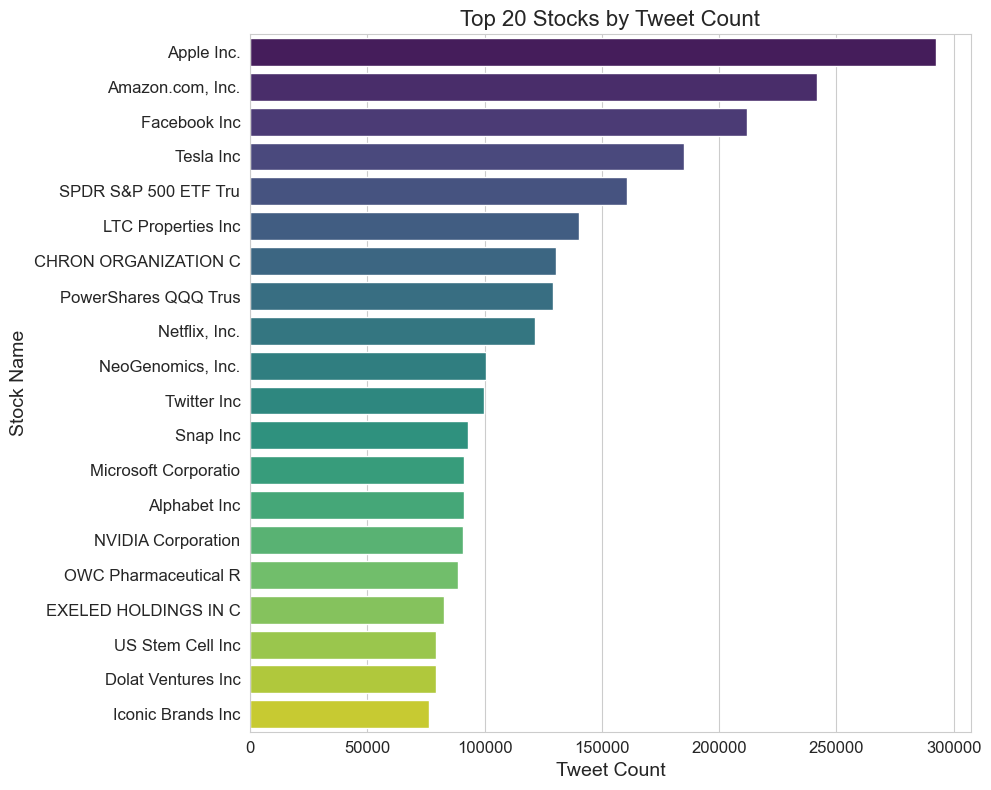

In [10]:
top_20_stocks = df_companies.nlargest(20, 'tweet_count')

sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
sns.barplot(x='tweet_count', y='name', data=top_20_stocks, palette='viridis')
plt.title('Top 20 Stocks by Tweet Count', fontsize=16)
plt.xlabel('Tweet Count', fontsize=14)
plt.ylabel('Stock Name', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

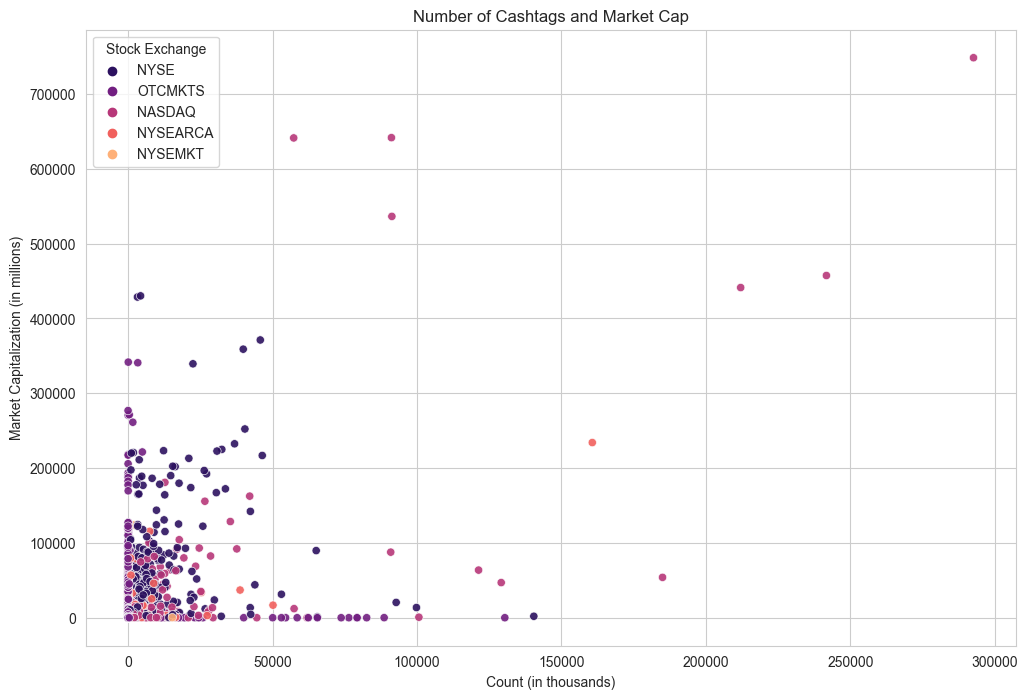

In [11]:
df_companies['capitalization'] = df_companies['capitalization'] / (10 ** 6)

plt.figure(figsize=(12, 8))
sns.scatterplot(x='tweet_count', y='capitalization',
                hue='exchange', data=df_companies, palette='magma', alpha=0.9)
plt.xlabel('Count (in thousands)')
plt.ylabel('Market Capitalization (in millions)')
plt.title('Number of Cashtags and Market Cap')
plt.legend(title='Stock Exchange')
plt.grid(True)
plt.show()

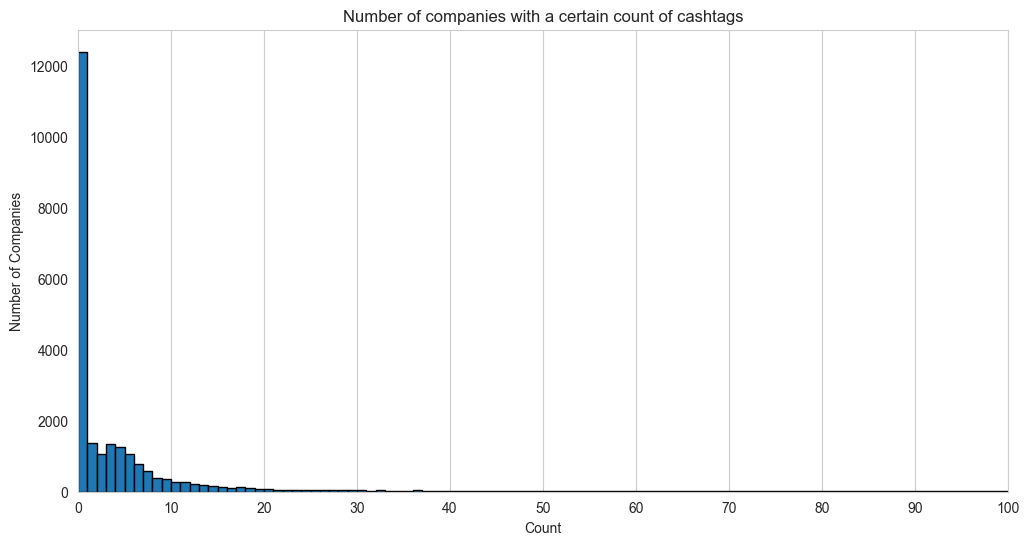

In [12]:
plt.figure(figsize=(12, 6))
plt.hist(df_companies['tweet_count'], bins=range(0, 101), edgecolor='black')
plt.title('Number of companies with a certain count of cashtags')
plt.xlabel('Count')
plt.ylabel('Number of Companies')
plt.xticks(range(0, 101, 10))
plt.xlim(0, 100)
plt.grid(axis='y')
plt.show()

Now for better visualization we will use logarithmic scale

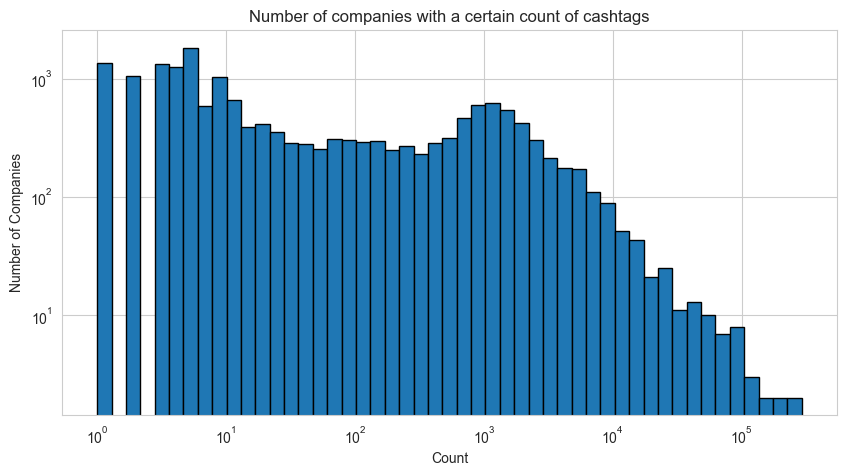

In [13]:
tweet_counts = df_companies['tweet_count']
bin_edges = np.logspace(np.log10(1), np.log10(tweet_counts.max()), num=50)

plt.figure(figsize=(10, 5))
plt.hist(tweet_counts, bins=bin_edges, edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.title('Number of companies with a certain count of cashtags')
plt.xlabel('Count')
plt.ylabel('Number of Companies')
plt.grid(True)
plt.show()

Boxplot of market capitalization for each exchange

c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


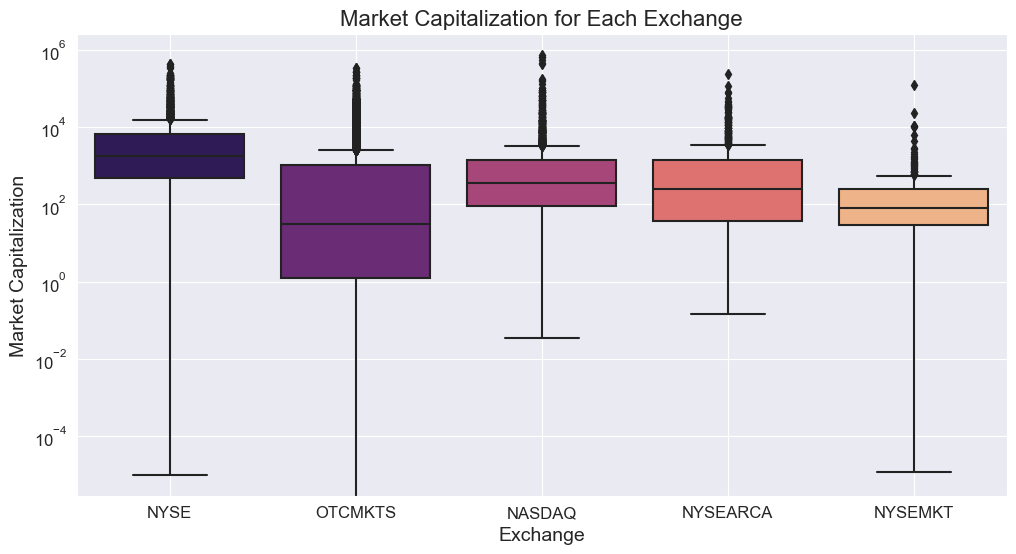

In [14]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='exchange', y='capitalization', data=df_companies, palette='magma')
plt.yscale('log')
plt.title('Market Capitalization for Each Exchange', fontsize=16)
plt.xlabel('Exchange', fontsize=14)
plt.ylabel('Market Capitalization', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

## Task2

### Statistics on distributions of 5 individual stocks over time. Choose the individual stocks to perform reflect different sectors of the economy. 

Choosing 5 individual stocks; we will choose Apple, Ford, Microsoft, Twitter, Tesla.

In [15]:
# Searsh to find ticker of these 5 individual stocks:
print('Apple: \n', df_companies[df_companies['name'].str.contains('Apple')])
print()
print('Ford: \n', df_companies[df_companies['name'].str.contains('Ford')])
print()
print('Microsoft: \n', df_companies[df_companies['name'].str.contains('Microsoft')])
print()
print('Twitter: \n', df_companies[df_companies['name'].str.contains('Twitter')])
print()
print('Amazon: \n', df_companies[df_companies['name'].str.contains('Amazon')])

Apple: 
      ticker                  name exchange  capitalization  tweet_count
65     AAPL            Apple Inc.   NASDAQ       748550.00     292631.0
1621   APLE  Apple Hospitality RE     NYSE         4250.00       1278.0
3334   BLES  Apple Green Holding   OTCMKTS            2.14          6.0

Ford: 
       ticker                  name exchange  capitalization  tweet_count
8321    ECCE  Eagle Ford Oil & Gas  OTCMKTS            6.33          3.0
9620       F    Ford Motor Company     NYSE        43980.00      43895.0
10443  FOVSY  Ford OtomotiveSanayi  OTCMKTS         4430.00         14.0

Microsoft: 
       ticker                  name exchange  capitalization  tweet_count
17985   MSFT  Microsoft Corporatio   NASDAQ        536460.0      91313.0

Twitter: 
       ticker         name exchange  capitalization  tweet_count
27411   TWTR  Twitter Inc     NYSE         13600.0      99820.0

Amazon: 
      ticker                name exchange  capitalization  tweet_count
1392   AMZN    Amazon

Therefore:

In [16]:
stocks = ['AAPL', 'F', 'MSFT', 'TWTR', 'TSLA']

In [17]:
# Convert the 'created_at' column to datetime
df_tweets['created_at'] = pd.to_datetime(df_tweets['created_at'])

C:\Users\Dan\AppData\Local\Temp\ipykernel_7752\3545048924.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_tweets['created_at'] = pd.to_datetime(df_tweets['created_at'])


c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

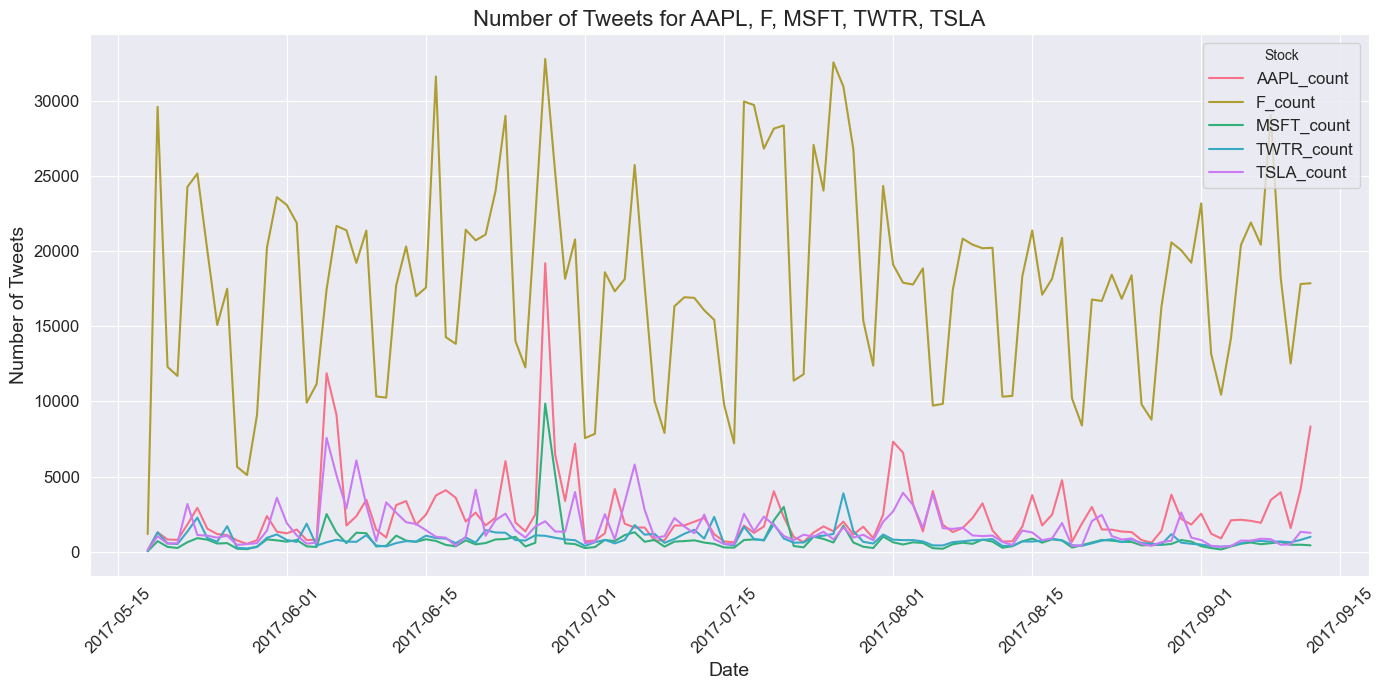

In [18]:
# Extracting the date from datetime
df_tweets['date'] = df_tweets['created_at'].dt.date

# Initialize a DataFrame to store the count of tweets per stock per date
tweet_counts = pd.DataFrame()

# Loop through each stock and calculate the number of tweets per date
for stock in stocks:
    # Filter df_entities for the current stock's cashtag
    stock_entities = df_entities[df_entities['text'].str.contains(stock, na=False)]
    
    # Filter df_tweets for those that mention the current stock's cashtag
    stock_tweets = df_tweets[df_tweets['id'].isin(stock_entities['tweet_id'])]
    
    # Group by date and count the number of tweets
    stock_tweet_counts = stock_tweets.groupby('date').size().reset_index(name=f'{stock}_count')
    
    # If the tweet_counts DataFrame is empty, initialize it with the current stock's tweet counts
    if tweet_counts.empty:
        tweet_counts = stock_tweet_counts
    else:
        # Otherwise, merge the current stock's tweet counts with the existing tweet_counts DataFrame
        tweet_counts = tweet_counts.merge(stock_tweet_counts, on='date', how='outer')

# Replace NaN values with 0 to account for dates where there were no tweets for a stock
tweet_counts.fillna(0, inplace=True)

# Now we will melt the DataFrame to have a suitable format for sns.lineplot
tweet_counts_melted = tweet_counts.melt(id_vars=['date'], var_name='Stock', value_name='Tweet Count')

# Plotting the data
sns.set_style("darkgrid")
custom_palette = sns.color_palette("husl", 5)
plt.figure(figsize=(14, 7))
sns.lineplot(data=tweet_counts_melted, x='date', y='Tweet Count', hue='Stock', palette=custom_palette)
plt.title('Number of Tweets for AAPL, F, MSFT, TWTR, TSLA', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=14)
plt.legend(title='Stock', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### Introduction

In this report, we delve into the tweet activity surrounding five prominent companies, each emblematic of distinct economic sectors. Our aim is to track the ebbs and flows of discourse concerning these entities over time, discerning any discernible trends or recurrent patterns across sectors. The entities under scrutiny in this analysis encompass Apple Inc. (AAPL), Tesla Inc. (TSLA), Microsoft Corp. (MSFT), Twitter Inc. (TWTR), and Ford Inc. (F).

### Methodology

The period under examination extends from May 15, 2017, to September 15, 2017. Throughout this timeframe, we meticulously monitored the daily occurrences of tweets referencing the stock ticker symbols of each company. Subsequently, these tallies were graphically represented on a time series plot, offering a clear depiction of the fluctuating frequency and distribution of tweets over the specified duration.

### Analysis

#### Overview of Trends

- **Apple Inc. (AAPL)** and **Microsoft Corp. (MSFT)** show consistent tweet volumes with occasional peaks. These companies represent the technology sector and are often discussed in the context of product releases and corporate earnings reports.
- **Tesla Inc. (TSLA)** and **Ford Inc. (F)** exhibits more pronounced spikes in tweet volume, which may correlate with news events specific to the automotive or energy sectors, such as product launches or announcements by Elon Musk.
- **Twitter Inc. (AMZN)** has a few notable peaks, potentially related to social media trends, regulatory news, or financial reports.

#### Specific Observations

- The largest peak for **Tesla (TSLA)** in late June could be associated with a significant company milestone or a high-impact announcement.
- **Apple (AAPL)** shows a substantial peak in early September, often associated with its yearly product announcement event.
- **Microsoft (MSFT)** although it is quite steady, in the late june of 2017 it had a noticeable increase.
### Conclusion

The evidence suggests that both company-specific occurrences and broader sectoral shifts wield considerable influence over public discourse on social media channels like Twitter. Through a meticulous examination of tweet volumes across various time spans, stakeholders stand to glean valuable insights into prevailing public interest and sentiment. Such insights hold the potential to inform decision-making processes pertaining to marketing initiatives, investment strategies, or public relations endeavors.

## Task3
### Statistics on distributions of all financial tweets over time. 

c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


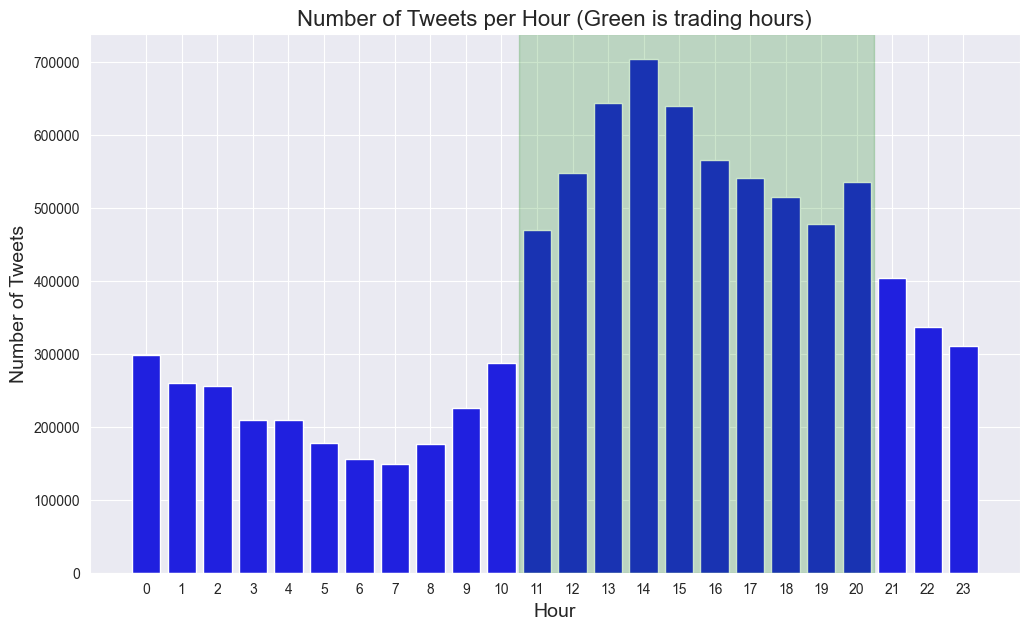

In [19]:
# Extract the hour from the 'created_at' column
df_tweets['hour'] = df_tweets['created_at'].dt.hour
tweet_counts_by_hour = df_tweets.groupby('hour').size().reset_index(name='tweet_count')

plt.figure(figsize=(12, 7))
sns.barplot(x='hour', y='tweet_count', data=tweet_counts_by_hour, color='blue')

# Highlight trading hours (9:30 am to 4:00 pm EST) with a different color
plt.axvspan(10.5, 20.5, color='green', alpha=0.2)
plt.title('Number of Tweets per Hour (Green is trading hours)', fontsize=16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=14)
plt.grid(True)
plt.show()

c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


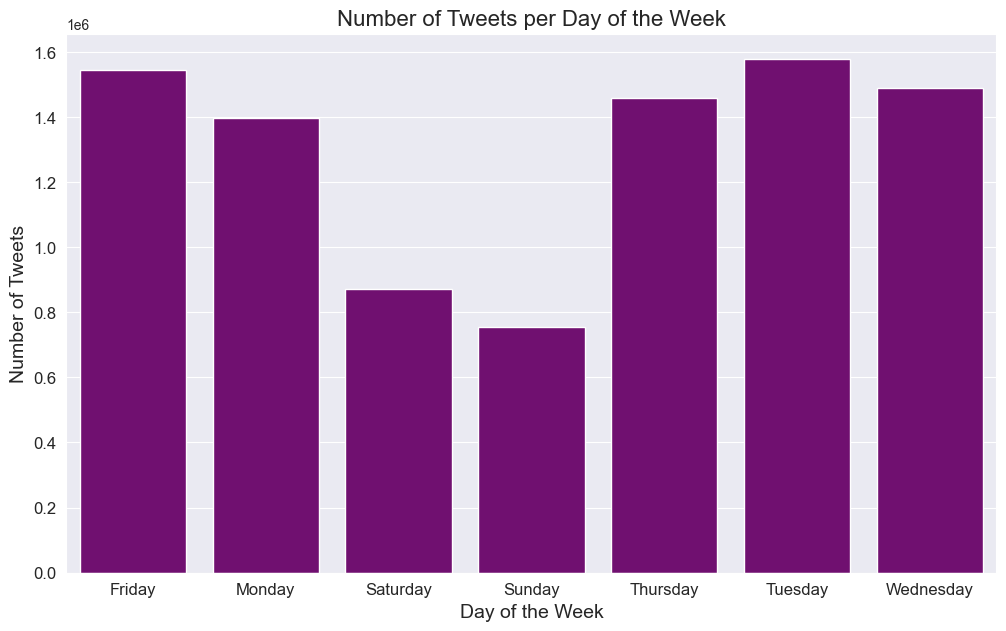

In [20]:
# Extract the day from the 'created_at' column
df_tweets['day'] = df_tweets['created_at'].dt.day_name()
tweet_counts_by_day = df_tweets.groupby('day').size().reset_index(name='tweet_count')

plt.figure(figsize=(12, 7))
sns.barplot(x='day', y='tweet_count', data=tweet_counts_by_day, color='purple')
plt.title('Number of Tweets per Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

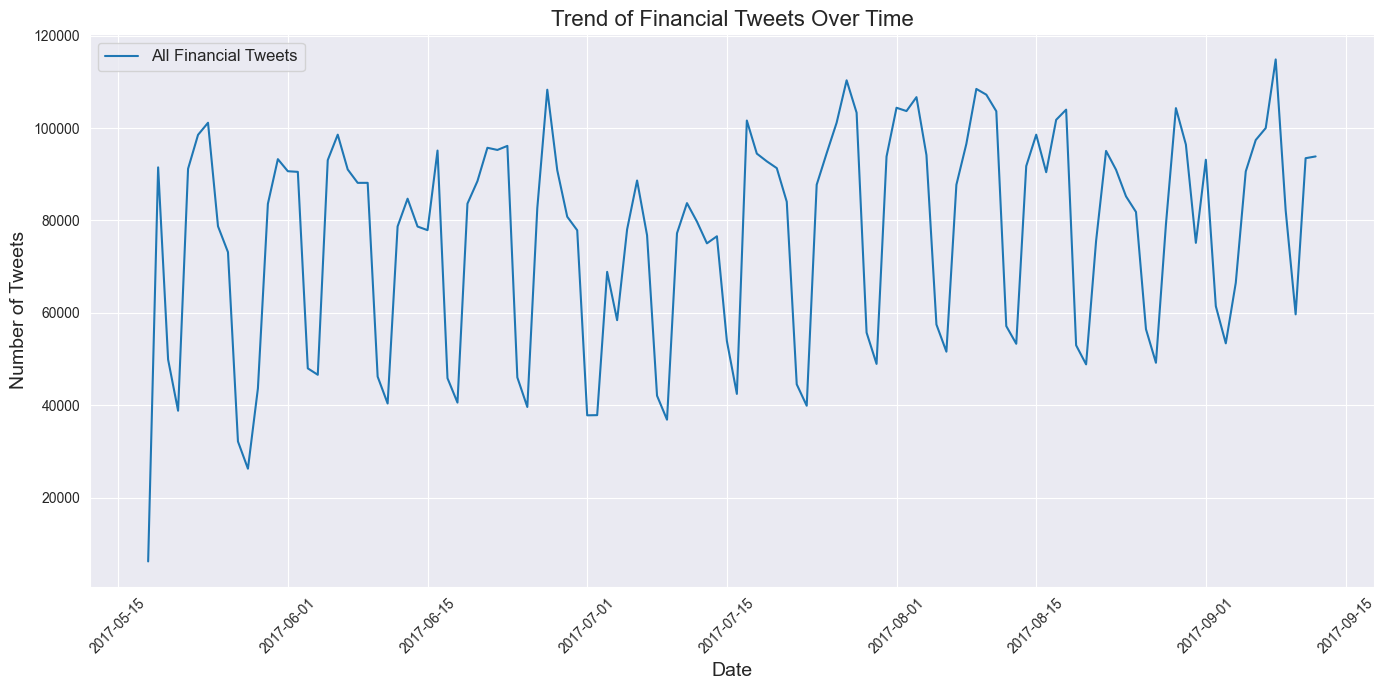

In [21]:
# Group the tweets by date and count them
tweet_counts_by_date = df_tweets.groupby('date').size().reset_index(name='tweet_count')

plt.figure(figsize=(14, 7))
sns.lineplot(data=tweet_counts_by_date, x='date', y='tweet_count', label='All Financial Tweets')
plt.title('Trend of Financial Tweets Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The outputs provided offer an in-depth analysis of the temporal distribution of financial tweets, with each output centering on a distinct facet of the dataset.

### Output 1: Hourly Distribution of Tweets

#### Observations:
- **Tweet Activity**: Begins to rise from midnight and sees a gradual increase, with a significant uptick from the 9th hour which aligns with the opening of standard trading hours.
- **Peak Activity**: Noted during late trading hours, suggesting a correlation with market closing summaries and reactions to the day's financial events.
- **Post Trading Hours**: There is a decline in tweet volume, indicating less discussion outside typical market operation times.

### Output 2: Daily Distribution of Tweets

#### Observations:
- **Week's End**: The highest volume of tweets is on Friday, indicating reactions to the week's financial events or anticipation of weekend news.
- **Weekend Quiet**: Saturday shows the lowest volume of tweets, with activity picking up again during the weekdays.
- **Midweek Activity**: Increases notably on days like Tuesday and Wednesday, which may be associated with weekly financial announcements or regular market activity.

### Output 3: Financial Tweets Over Time

#### Observations:
- **Fluctuations**: Significant ebb and flow in the volume of tweets throughout the observed period.
- **Spikes**: These may correspond with major financial events, market shocks, or economic data releases.
- **Cyclical Patterns**: Suggest a correlation with weekly market activity, with valleys potentially indicating weekends or non-trading days.

These outputs collectively provide insights into the temporal dynamics of financial discussions on Twitter, which could be beneficial for financial analysts, traders, or social media strategists interested in public sentiment, planning of social media engagement, or identification of significant financial events as reflected in social media activity.


## Task4
### Statistics on distributions of retweets per tweets including individual stocks (at least 2 chosen stocks) over time. 

#### For 5 stocks

In [22]:
# we create a new DataFrame 'df_stock_tweets' that counts retweets per hour for each stock

# This will hold the counts for each stock and hour
df_stock_tweets = pd.DataFrame()

for stock in stocks:
    # Filter for tweets containing the stock's cashtag
    stock_entities = df_entities[df_entities['text'].str.contains(stock, na=False)]
    
    # Filter for retweets of those tweets
    stock_retweets = df_tweets[df_tweets['retweeted_status_id'].isin(stock_entities['tweet_id'])]
    
    # Count retweets per hour
    retweet_counts = stock_retweets.groupby('hour').size().reset_index(name=f'{stock}_count')
    
    # If this is the first stock, initialize df_stock_tweets
    if df_stock_tweets.empty:
        df_stock_tweets = retweet_counts
    else:
        # Merge the counts for this stock with the main DataFrame
        df_stock_tweets = df_stock_tweets.merge(retweet_counts, on='hour', how='outer')

# Fill any NaNs that resulted from the merge with 0
df_stock_tweets.fillna(0, inplace=True)

c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

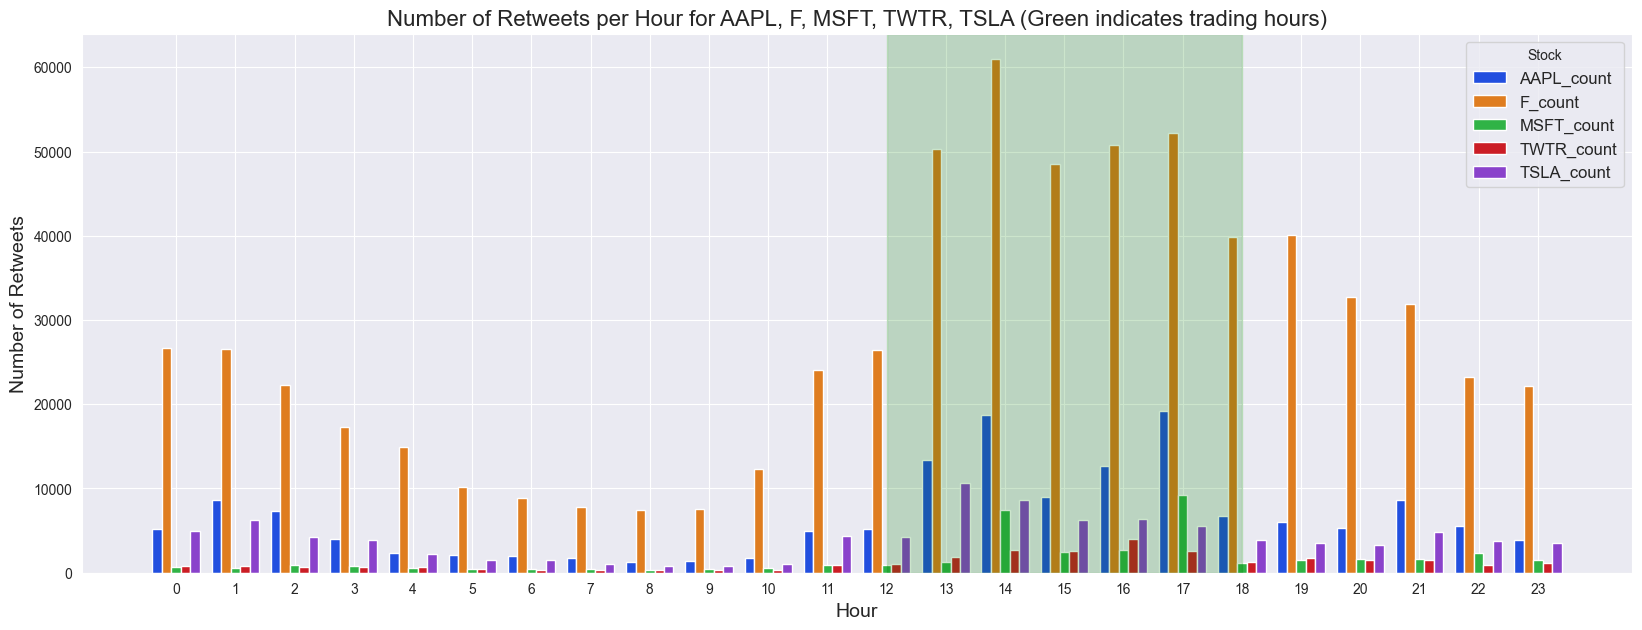

In [23]:
# Now create a melted DataFrame for Seaborn
df_melted = df_stock_tweets.melt(id_vars='hour', var_name='Stock', value_name='Retweet Count')

plt.figure(figsize=(20, 7))
sns.barplot(x='hour', y='Retweet Count', hue='Stock', data=df_melted, palette='bright')

# Highlight trading hours (9:30 am to 4:00 pm EST) with a different color
plt.axvspan(12, 18, color='green', alpha=0.2)

plt.title('Number of Retweets per Hour for AAPL, F, MSFT, TWTR, TSLA (Green indicates trading hours)', fontsize=16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Number of Retweets', fontsize=14)
plt.legend(title='Stock', fontsize=12)
plt.grid(True)
plt.show()

c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

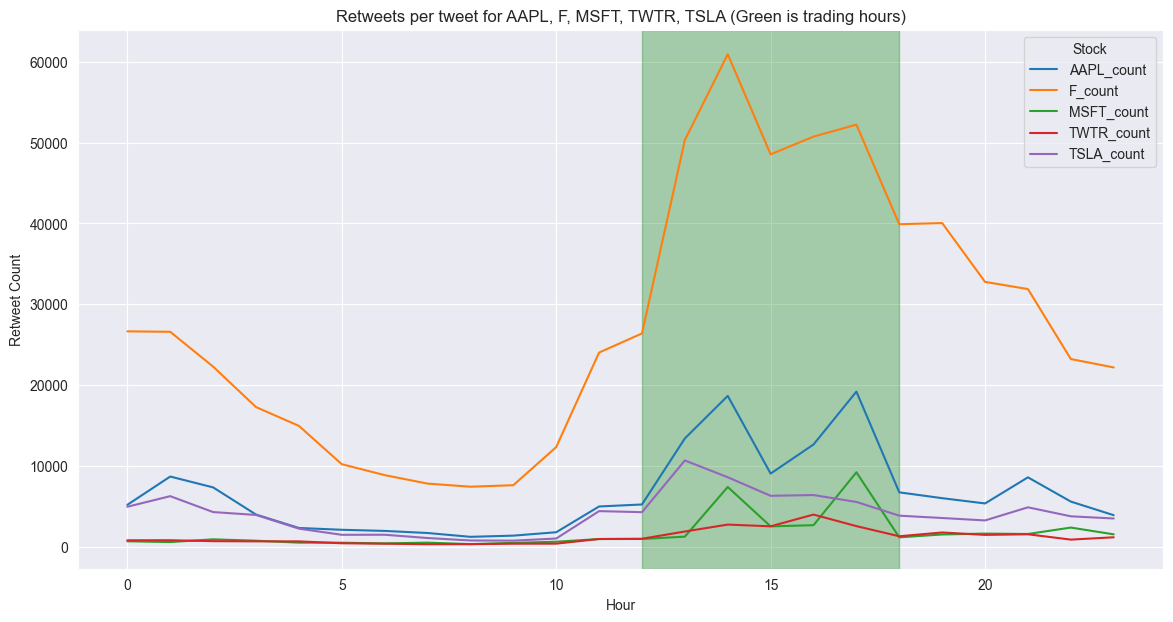

In [24]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_melted, x='hour', y='Retweet Count', hue='Stock')
sns.lineplot()
# Highlight trading hours (9:30 am to 4:00 pm EST)
plt.axvspan(12, 18, color='green', alpha=0.3)
plt.title('Retweets per tweet for AAPL, F, MSFT, TWTR, TSLA (Green is trading hours)')
plt.xlabel('Hour')
plt.ylabel('Retweet Count')
plt.legend(title='Stock')
plt.grid(True)
plt.show()

#### For 2 stocks

In [25]:
stocks = ['AAPL', 'TSLA']
# create a new DataFrame 'df_stock_tweets' that counts retweets per hour for each stock

# This will hold the counts for each stock and hour
df_stock_tweets = pd.DataFrame()

for stock in stocks:
    # Filter for tweets containing the stock's cashtag
    stock_entities = df_entities[df_entities['text'].str.contains(stock, na=False)]
    
    # Filter for retweets of those tweets
    stock_retweets = df_tweets[df_tweets['retweeted_status_id'].isin(stock_entities['tweet_id'])]
    
    # Count retweets per hour
    retweet_counts = stock_retweets.groupby('hour').size().reset_index(name=f'{stock}_count')
    
    # If this is the first stock, initialize df_stock_tweets
    if df_stock_tweets.empty:
        df_stock_tweets = retweet_counts
    else:
        # Merge the counts for this stock with the main DataFrame
        df_stock_tweets = df_stock_tweets.merge(retweet_counts, on='hour', how='outer')

# Fill any NaNs that resulted from the merge with 0
df_stock_tweets.fillna(0, inplace=True)

c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

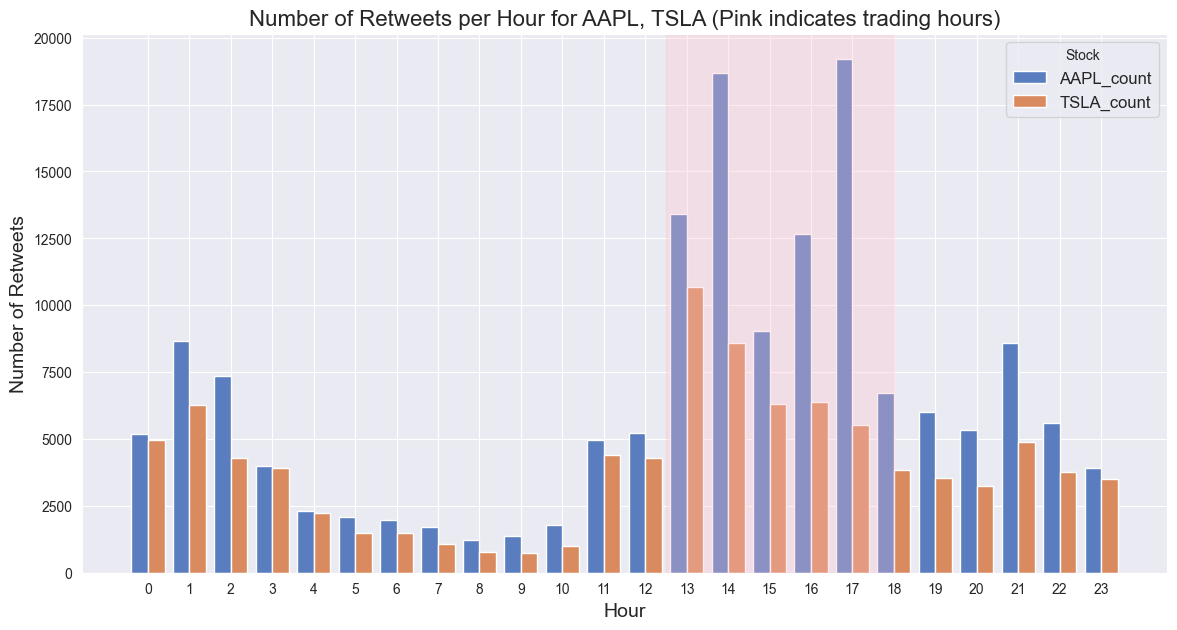

In [26]:
df_melted = df_stock_tweets.melt(id_vars='hour', var_name='Stock', value_name='Retweet Count')

plt.figure(figsize=(14, 7))
sns.barplot(x='hour', y='Retweet Count', hue='Stock', data=df_melted, palette='muted')

# Highlight trading hours (9:30 am to 4:00 pm EST) with a different color
plt.axvspan(12.5, 18, color='pink', alpha=0.3)
plt.title('Number of Retweets per Hour for AAPL, TSLA (Pink indicates trading hours)', fontsize=16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Number of Retweets', fontsize=14)
plt.legend(title='Stock', fontsize=12)
plt.grid(True)
plt.show()

Another type of plot for the retweets

c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

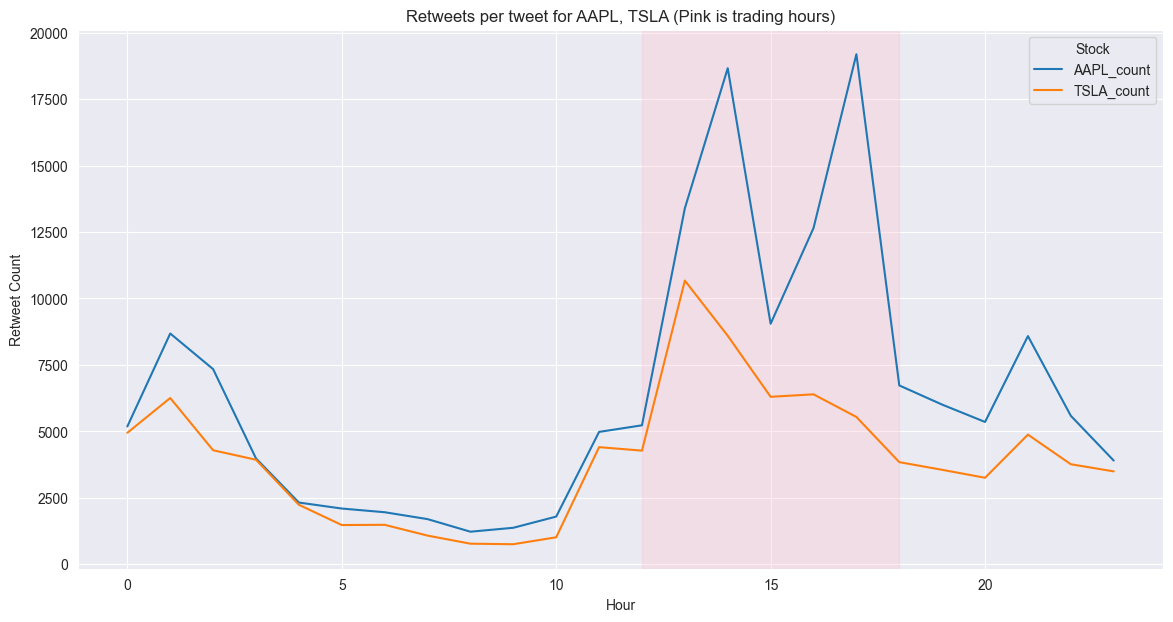

In [27]:
plt.figure(figsize=(14, 7))

sns.lineplot(data=df_melted, x='hour', y='Retweet Count', hue='Stock')
sns.lineplot()
# Highlight trading hours (9:30 am to 4:00 pm EST)
plt.axvspan(12, 18, color='pink', alpha=0.3)
plt.title('Retweets per tweet for AAPL, TSLA (Pink is trading hours)')
plt.xlabel('Hour')
plt.ylabel('Retweet Count')
plt.legend(title='Stock')
plt.grid(True)
plt.show()

The visualizations illustrate the fluctuation of retweets per tweet for specific individual stocks over time, accentuating peak viewership periods in pink.

### Output 1: Number of Retweets per Hour for Multiple Stocks

#### Observations:
- Elevated retweet volumes during peak activity periods imply heightened user involvement.
- Peaks in retweet counts might align with noteworthy news events or market responses.
- Notably, AAPL and TSLA stocks exhibit substantial retweet volumes, underscoring robust public interest or reactions to events.

### Output 2: Retweets per Tweet for Multiple Stocks

#### Observations:
- Steep spikes during peak viewership periods signify instances when tweets regarding these stocks garnered exceptional resonance or coincided with significant announcements.

### Output 3: Number of Retweets per Hour for Two Stocks

#### Observations:
- Noteworthy retweet activity for AAPL and TSLA during high-traffic hours indicates robust user engagement.
- The congruence in engagement trends hints at a potential overlap in the audience intrigued by these stocks.

### Output 4: Retweets per Tweet for Two Stocks

#### Observations:
- The surge in the retweet-to-tweet ratio during peak viewing periods suggests a heightened level of engagement with content related to these stocks during those times.
- Analysis of engagement patterns for AAPL and TSLA unveils both correlations and disparities, indicating distinct user behaviors in disseminating information about these stocks.

## Task5
### Statistics on most important financial information on individual stocks (at least 2 chosen stocks) computed solely from the financial information (not tweets). 

c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


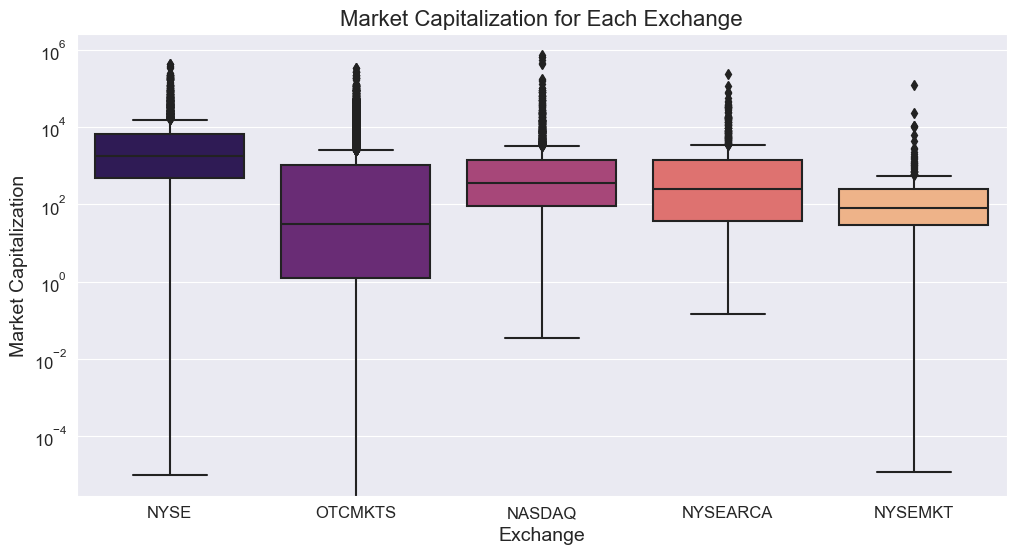

In [28]:
# Creating the boxplot with a logarithmic scale
plt.figure(figsize=(12, 6))
sns.boxplot(x='exchange', y='capitalization', data=df_companies, palette='magma')
plt.yscale('log')
plt.title('Market Capitalization for Each Exchange', fontsize=16)
plt.xlabel('Exchange', fontsize=14)
plt.ylabel('Market Capitalization', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [29]:
# Computing statistical parameters for each exchange
exchange_stats = df_companies.groupby('exchange')['capitalization'].agg(['mean', 'var', 'min', 'max'])

# Ranking the stocks within each exchange based on market capitalization
df_companies['rank'] = df_companies.groupby('exchange')['capitalization'].rank(method='max', ascending=False)
df_companies = df_companies.dropna(subset=['capitalization'])
df_companies = df_companies[df_companies['capitalization'] != 0]

c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

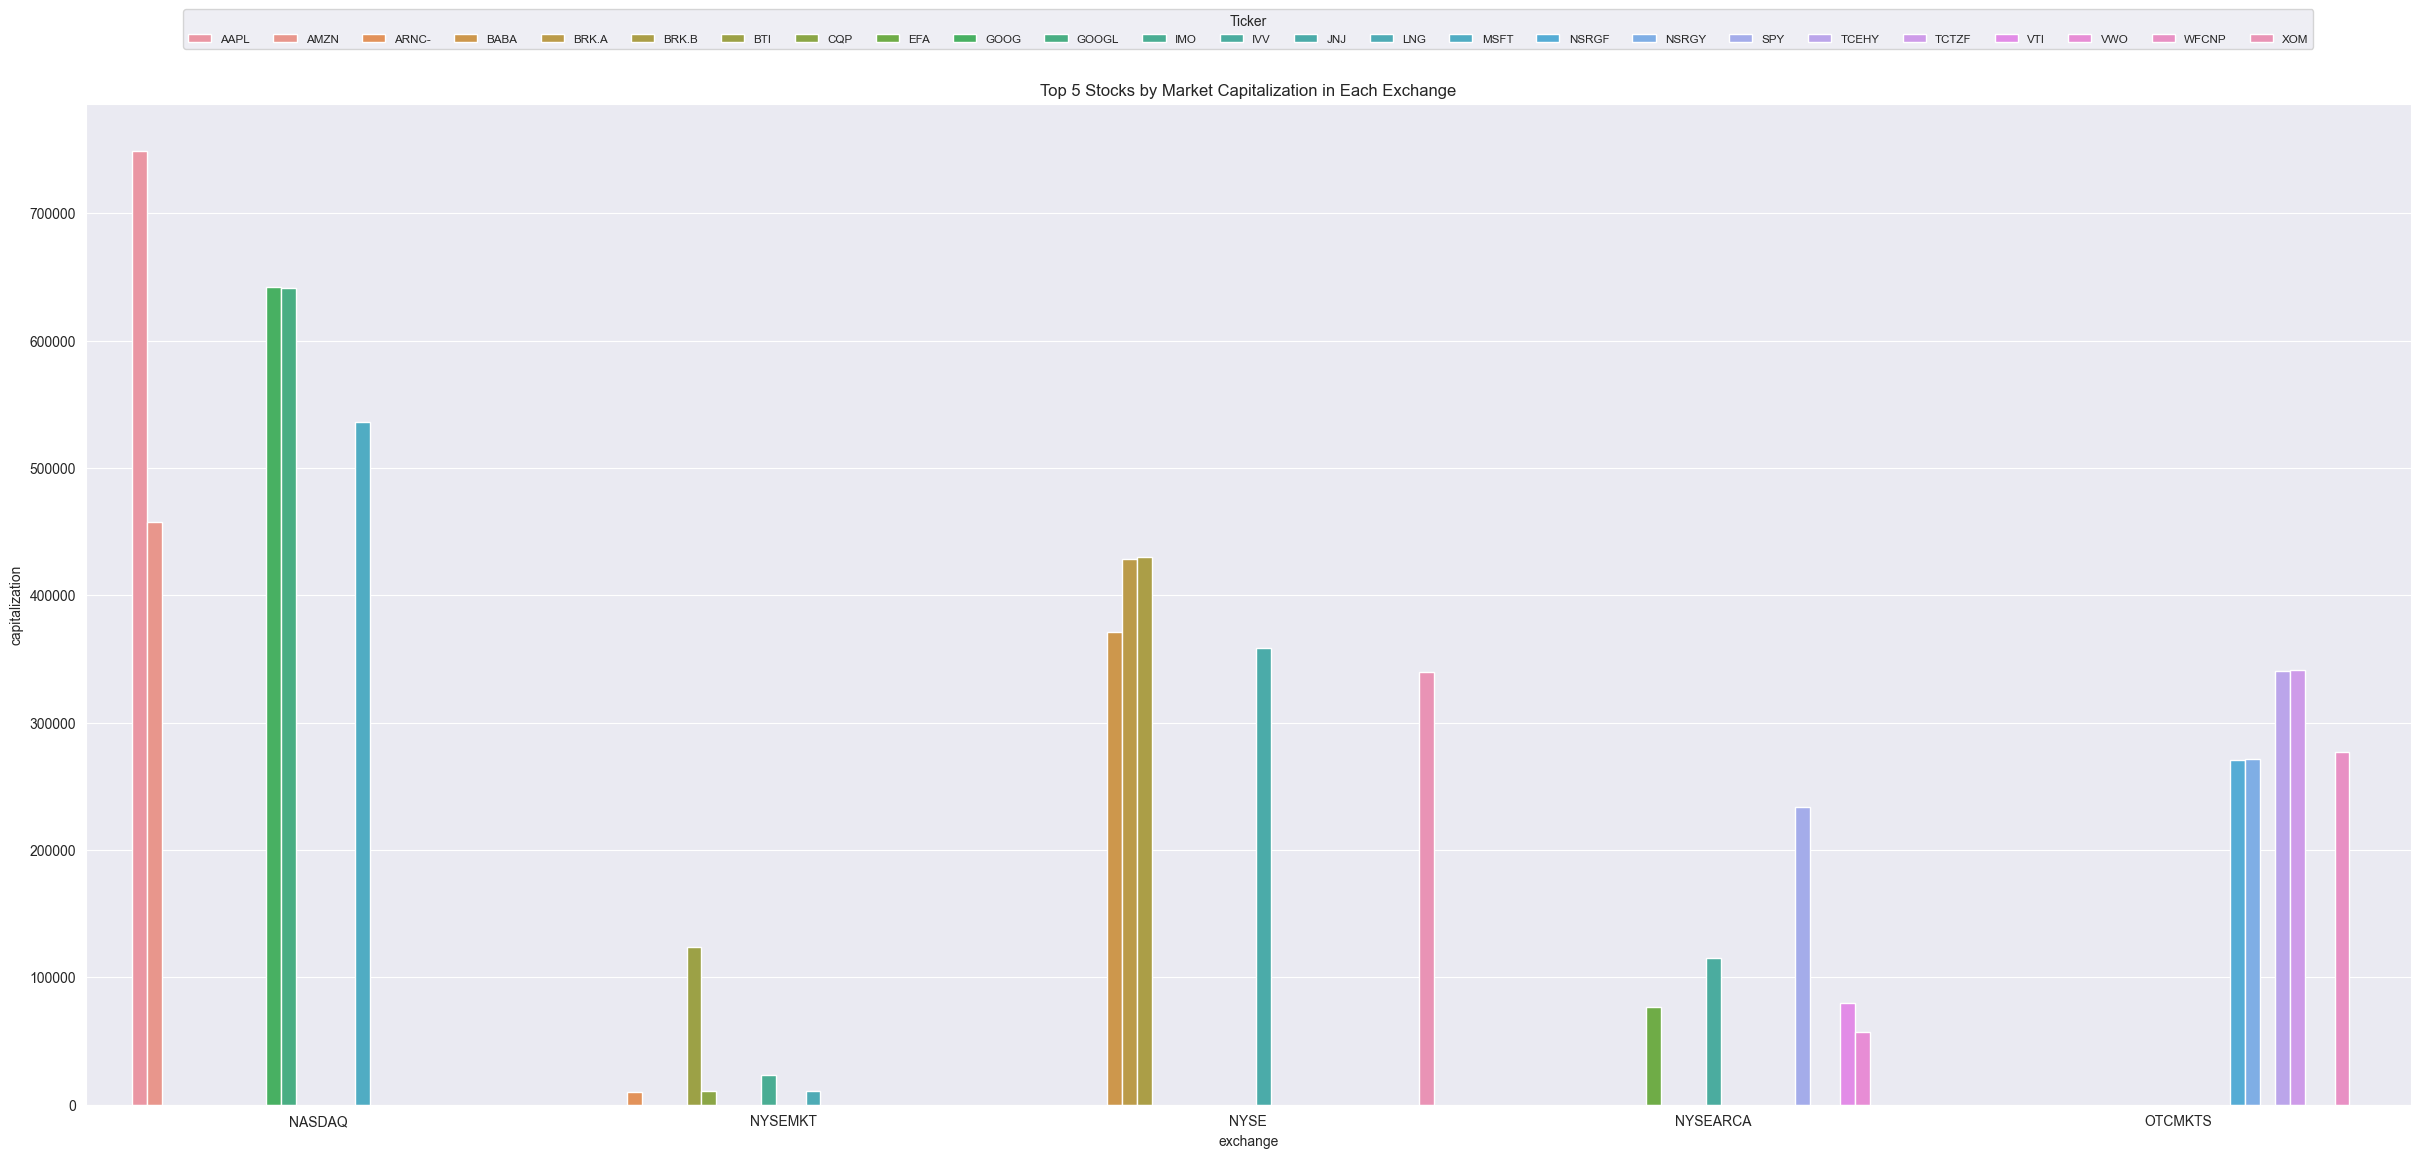

In [30]:
top_stocks = df_companies[df_companies['rank'] <= 5]

plt.figure(figsize=(30, 13))
sns.barplot(data=top_stocks, x='exchange', y='capitalization', hue='ticker', )
plt.title('Top 5 Stocks by Market Capitalization in Each Exchange')
plt.legend(title='Ticker', bbox_to_anchor=(0.5, 1.1), loc='upper center', ncol=len(top_stocks['ticker'].unique()), fontsize='small', title_fontsize='medium')
plt.show()

c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

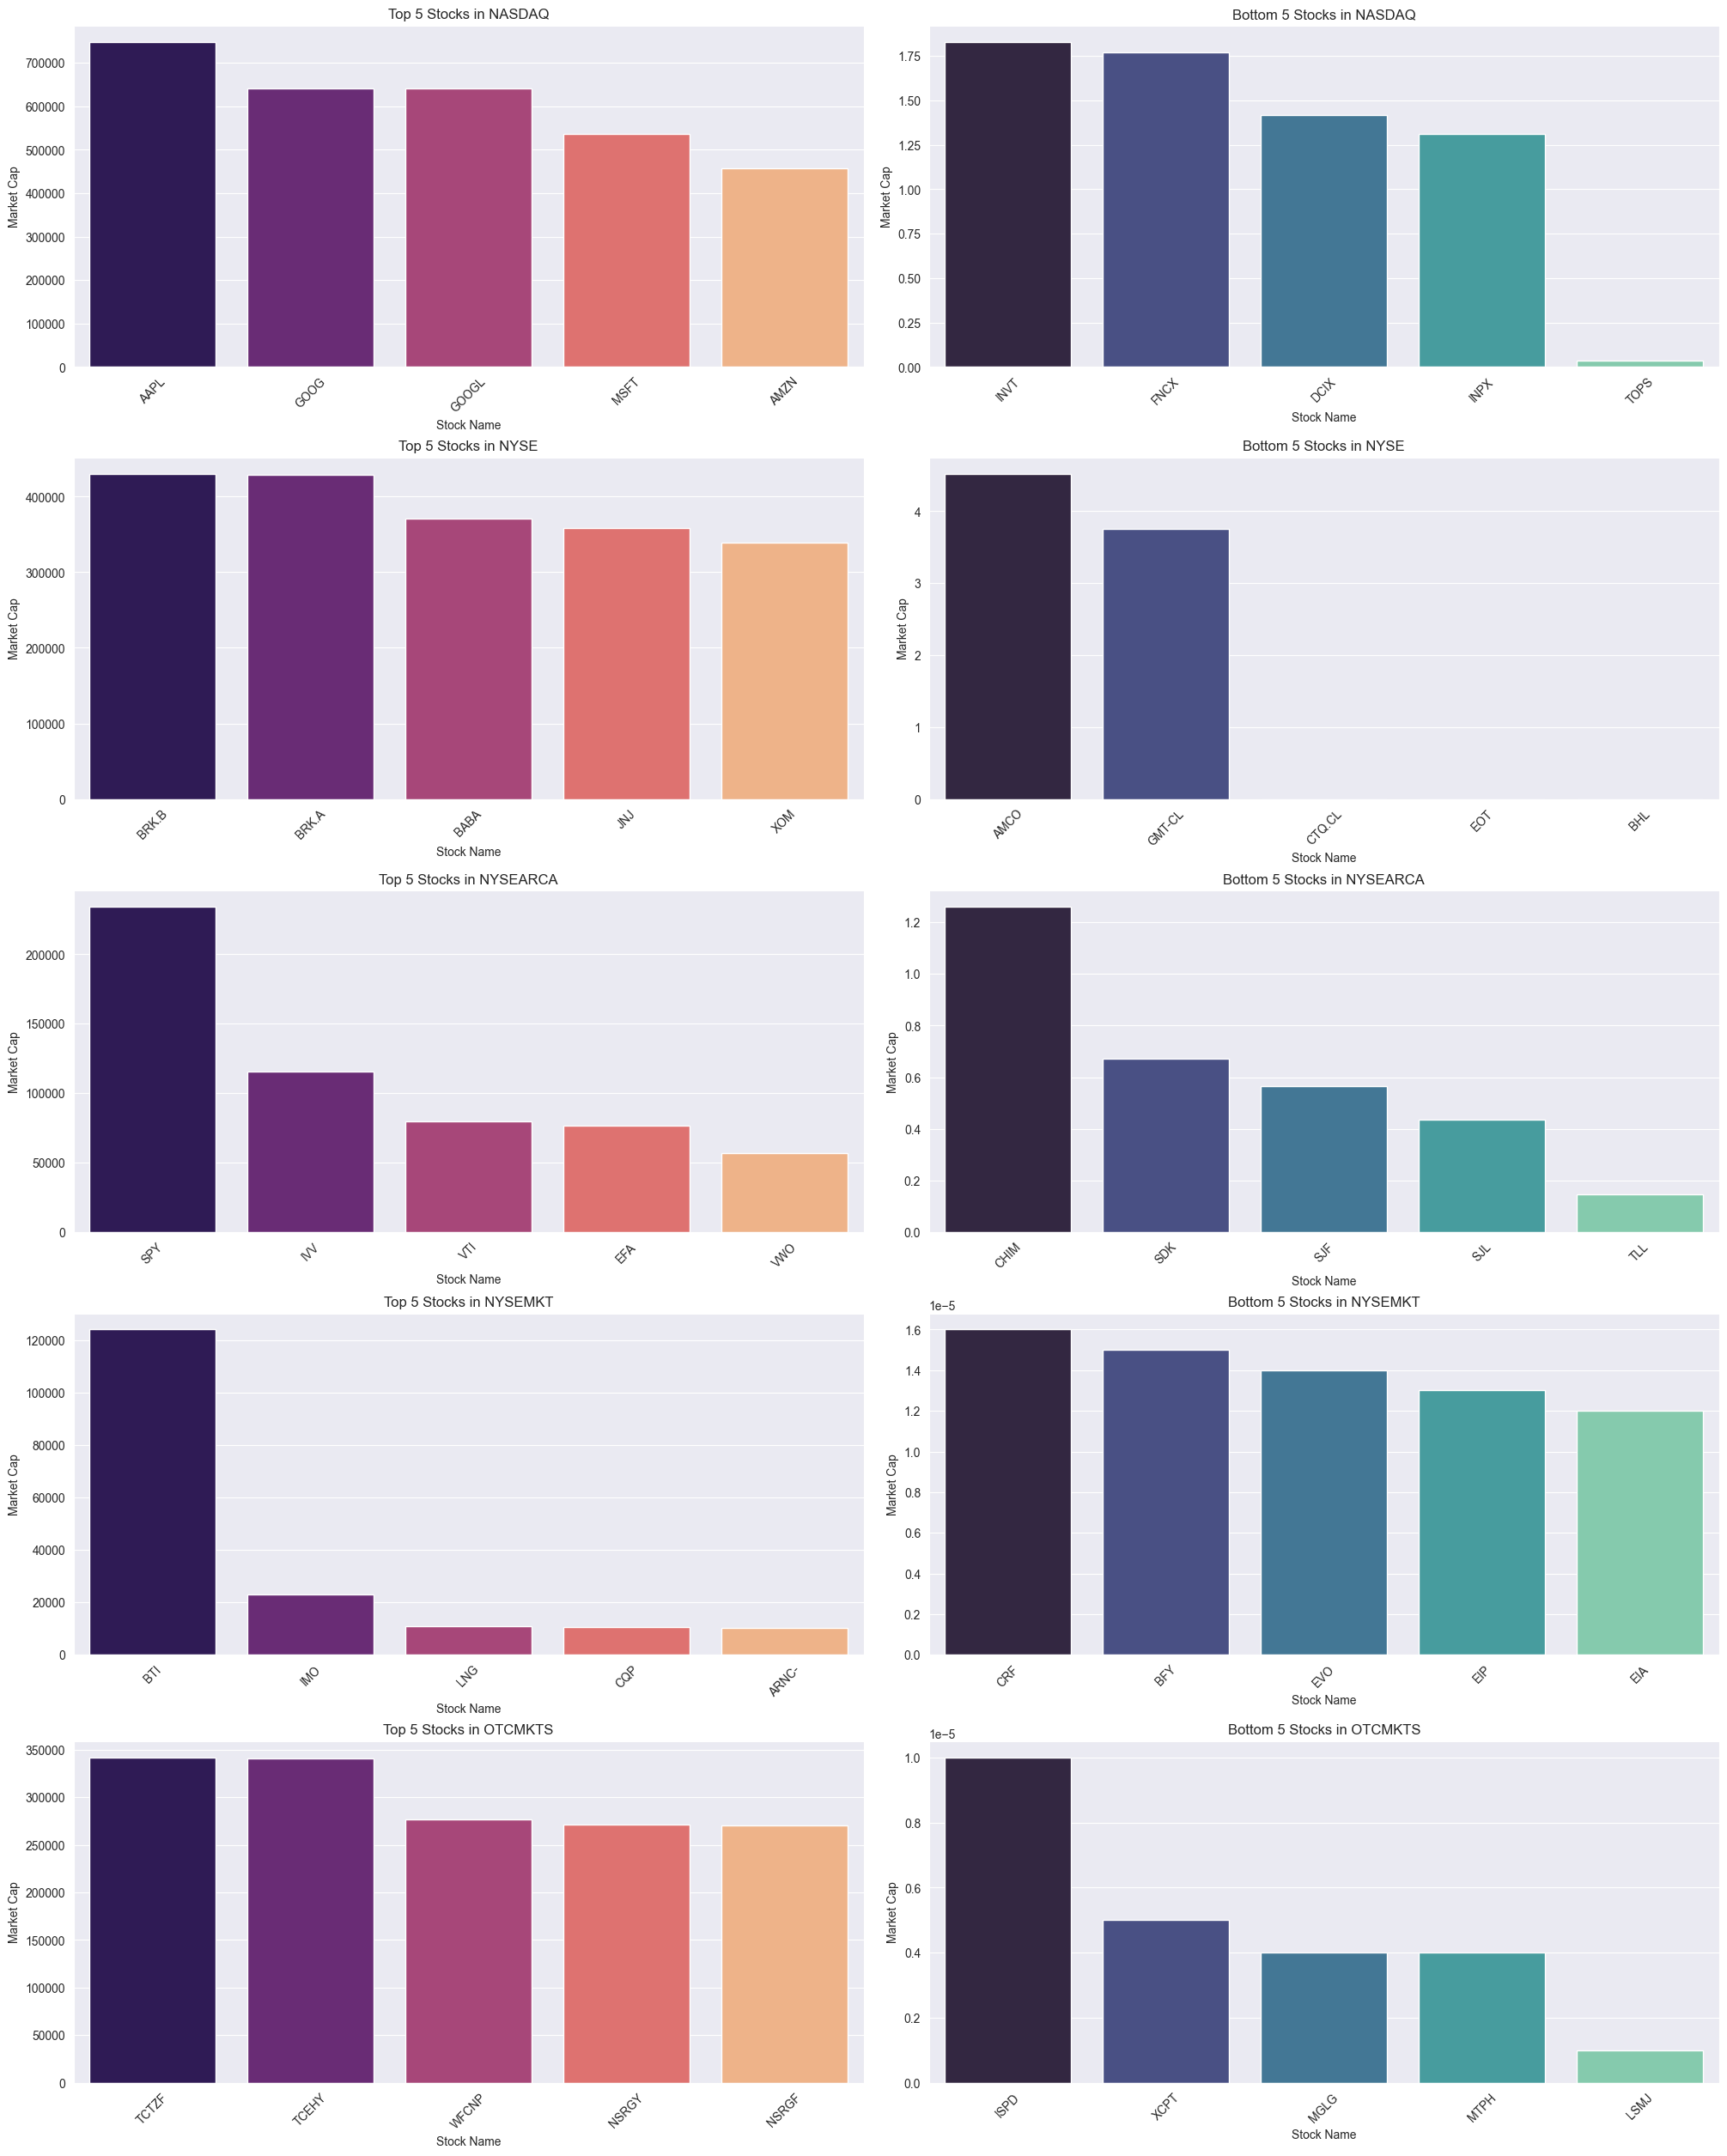

In [31]:
# Convert capitalization to float type
df_companies['capitalization'] = df_companies['capitalization'].astype(float)

# Sort the DataFrame by exchange and capitalization
df_companies_sorted = df_companies.sort_values(by=['exchange', 'capitalization'], ascending=[True, False])

# Assign ranks within each exchange based on sorted market capitalization
df_companies_sorted['rank'] = df_companies_sorted.groupby('exchange')['capitalization'].rank(method='first', ascending=False)

# Create subplots for each exchange
unique_exchanges = df_companies_sorted['exchange'].dropna().unique()
num_exchanges = len(unique_exchanges)
fig, axs = plt.subplots(num_exchanges, 2, figsize=(20, num_exchanges * 5), constrained_layout=True)

# Loop through exchanges and plot top and bottom 5 stocks
for i, exchange in enumerate(unique_exchanges):
    # Filter the DataFrame for the current exchange
    df_exchange = df_companies_sorted[df_companies_sorted['exchange'] == exchange]
    df_exchange = df_exchange.dropna(subset=['capitalization'])
    df_exchange = df_exchange[df_exchange['capitalization'] != 0]
    # Get the top 5 stocks by market capitalization within the exchange
    top_stocks = df_exchange.head(5)
    # Get the bottom 5 stocks by market capitalization within the exchange
    bottom_stocks = df_exchange.tail(5)
    # Plot for the top 5 stocks
    sns.barplot(ax=axs[i, 0], data=top_stocks, x='ticker', y='capitalization', palette='magma')
    axs[i, 0].set_title(f'Top 5 Stocks in {exchange}')
    axs[i, 0].set_xlabel('Stock Name')
    axs[i, 0].set_ylabel('Market Cap')
    axs[i, 0].tick_params(axis='x', rotation=45)
    
    # Plot for the bottom 5 stocks
    sns.barplot(ax=axs[i, 1], data=bottom_stocks, x='ticker', y='capitalization', palette='mako')
    axs[i, 1].set_title(f'Bottom 5 Stocks in {exchange}')
    axs[i, 1].set_xlabel('Stock Name')
    axs[i, 1].set_ylabel('Market Cap')
    axs[i, 1].tick_params(axis='x', rotation=45)

# Display the plots
plt.show()

This report offers a visual examination of fundamental financial metrics pertaining to individual stocks across diverse stock exchanges, drawing from financial data rather than social media metrics such as tweets.

### Market Capitalization across Exchanges
Presented here is a boxplot showcasing the distribution of market capitalizations for companies listed on different stock exchanges, encompassing NYSE, NASDAQ, and others. The vertical axis is logarithmically scaled to accommodate the wide-ranging values.

### Top 5 Stocks by Market Capitalization per Exchange
Displayed in this bar chart is a comparison of the market capitalization among the top 5 stocks within each exchange. It underscores the significant disparities in scale between major companies listed on the NASDAQ and NYSE versus those on other exchanges.

### Leading and Lagging Stocks across Exchanges
A series of bar charts delineate the top and bottom 5 stocks in terms of market capitalization across various exchanges. These visualizations serve to identify the premier and trailing companies within each market segment.

#### Observations:

- **Market Capitalization Diversity**: Notably, there exists significant diversity in market capitalization among companies across different exchanges, with the NYSE and NASDAQ notably hosting firms with the most substantial market caps.
- **Tech Sector Dominance**: The dominance of technology firms, particularly those listed on the NASDAQ, is evident in their consistently high market capitalizations.
- **Intra-Exchange Variability**: Even within premier exchanges such as the NYSE and NASDAQ, there is considerable variability in market capitalization, underscoring the inherent diversity within the market.</br>
These visual analyses offer valuable insights for investors and analysts, facilitating comparisons of financial health and market dominance across companies and exchanges. They provide a snapshot of the competitive dynamics within various sectors of the economy.


## Task6:
### Time series movement directions through time for individual stocks (at least 2). Choose companies you are familiar with. Try to explain the reason behind these directions from real world news. 

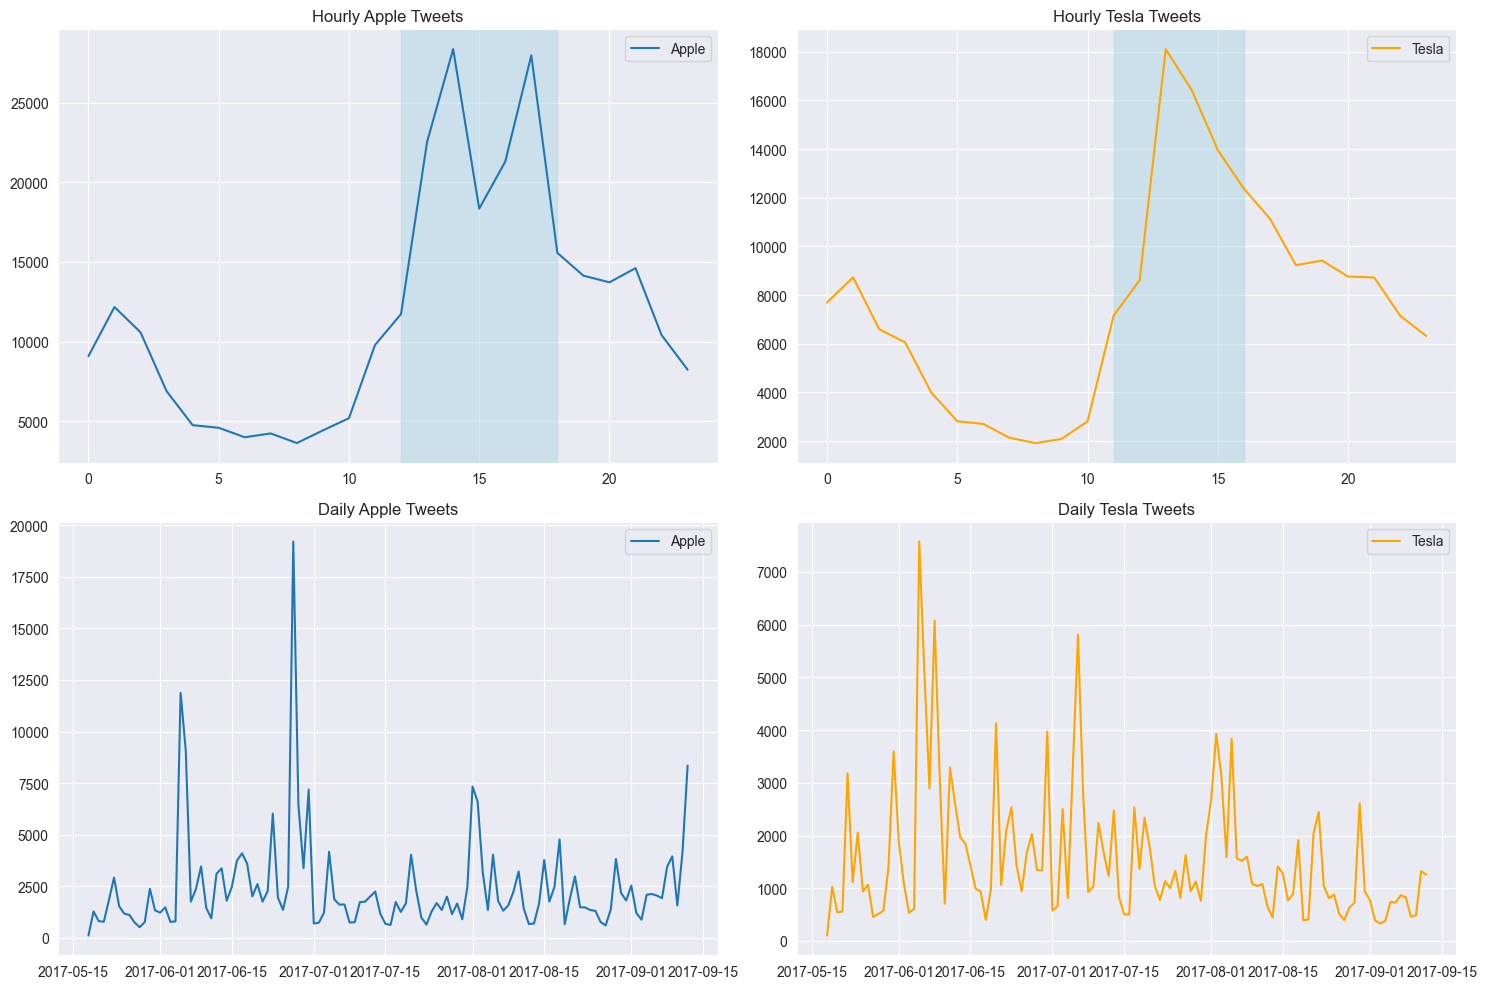

In [32]:
# Filter tweets for Apple and Tesla
apple_tweets = df_tweets[df_tweets['text'].str.contains('AAPL')]
tesla_tweets = df_tweets[df_tweets['text'].str.contains('TSLA')]

# Group and count tweets by date and hour
apple_hourly_tweets = apple_tweets.groupby('hour').size()
tesla_hourly_tweets = tesla_tweets.groupby('hour').size()

apple_daily_tweets = apple_tweets.groupby('date').size()
tesla_daily_tweets = tesla_tweets.groupby('date').size()

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot the number of tweets by hour for a specific day
axs[0, 0].plot(apple_hourly_tweets.index, apple_hourly_tweets.values, label='Apple')
axs[0, 0].axvspan(12, 18, color='lightblue', alpha=0.5)
axs[0, 1].plot(tesla_hourly_tweets.index, tesla_hourly_tweets.values, label='Tesla', color='orange')
axs[0, 1].axvspan(11, 16, color='lightblue', alpha=0.5)

# Plot the number of tweets by day for the entire dataset
axs[1, 0].plot(apple_daily_tweets.index, apple_daily_tweets.values, label='Apple')
axs[1, 1].plot(tesla_daily_tweets.index, tesla_daily_tweets.values, label='Tesla', color='orange')

# Set titles, labels, etc.
axs[0, 0].set_title('Hourly Apple Tweets')
axs[0, 1].set_title('Hourly Tesla Tweets')
axs[1, 0].set_title('Daily Apple Tweets')
axs[1, 1].set_title('Daily Tesla Tweets')

# Show legend
for ax in axs.flat:
    ax.legend()

plt.tight_layout()
plt.show()

Apple's quarterly reports for the past five years:
| Year | Q1 | Q2 | Q3 | Q4 |
|---|---|---|---|---|
| 2022 | January 27 | April 28 | July 28 | October 27 |
| 2021 | January 26 | April 28 | July 27 | October 28 |
| 2020 | January 28 | April 30 | July 30 | October 29 |
| 2019 | January 29 | April 30 | July 30 | October 30 |
| 2018 | January 31 | April 30 | July 31 | October 31 |

Tesla's quarterly reports for the past four years:
| Year | Q1 Report Date | Q2 Report Date | Q3 Report Date | Q4 Report Date |
|------|----------------|----------------|----------------|----------------|
| 2022 | January 26, 2022 | April 20, 2022 | July 20, 2022 | October 19, 2022 |
| 2021 | January 27, 2021 | April 26, 2021 | July 26, 2021 | October 20, 2021 |
| 2020 | January 29, 2020 | April 29, 2020 | July 22, 2020 | October 21, 2020 |
| 2019 | January 30, 2019 | April 24, 2019 | July 24, 2019 | October 23, 2019 |


## Analysis of Apple and Tesla Tweets
The visualizations provided depict the tweet activity surrounding Apple (AAPL) and Tesla (TSLA) over specific time intervals, both hourly and daily.

### Apple Tweets by Hour
The graph illustrates the hourly tweet count for Apple over the course of a typical day. Notably, the highlighted yellow area corresponds to market trading hours, showcasing a surge in tweet volume. This observation suggests heightened Twitter activity during trading hours, possibly reflecting reactions to market trends or the dissemination of Apple-related news.

### Tesla Tweets by Hour
Similarly, the plot for Tesla showcases the hourly tweet volume. The highlighted period, likely representing trading hours, indicates a peak in activity, which could signify responses to market developments or significant Tesla-related announcements.

### Apple Tweets by Day
This time series graph demonstrates the daily tweet volume for Apple across several months. Spikes in tweet activity, such as those observed around the end of July and October, coincide with notable company events, such as product launches or quarterly earnings reports. These spikes suggest increased Twitter engagement during significant Apple-related events.

### Tesla Tweets by Day
The daily tweet plot for Tesla also displays fluctuations, possibly linked to the company's quarterly reports or major announcements. Similar to Apple, heightened tweet activity is evident at the end of each fiscal quarter, indicating public responses to Tesla's financial updates.

### Comparative Analysis
To gain deeper insights into the impact of these events, overlaying the dates of quarterly reports onto the daily tweet plots would provide direct observations of the relationship between financial disclosures and Twitter activity. Additionally, analyzing tweet volume during highlighted trading hours offers insights into short-term reactions to market changes.

It's crucial to acknowledge that while these visualizations offer a glimpse into tweet volumes, further statistical analysis is necessary to establish a causal relationship between specific events and Twitter activity.


## Task7:
### Co-occurrence of various stocks in the same tweets

In [33]:
df_entities_cleaned = df_entities.dropna(subset=['text'])

# Filter tweets mentioning 'AAPL' and 'TSLA'
aapl_mentions = df_entities_cleaned[df_entities_cleaned['text'].str.contains('AAPL')]
tsla_mentions = df_entities_cleaned[df_entities_cleaned['text'].str.contains('TSLA')]

# Merge the filtered entities with df_tweets to get complete tweets
aapl_tweets_combined = aapl_mentions.merge(df_tweets, left_on='tweet_id', right_on='id')
tsla_tweets_combined = tsla_mentions.merge(df_tweets, left_on='tweet_id', right_on='id')

# Count the number of tweets per day for both stocks
aapl_daily_tweet_count = aapl_tweets_combined.groupby('date')['id'].count().reset_index(name='AAPL_tweet_count')
tsla_daily_tweet_count = tsla_tweets_combined.groupby('date')['id'].count().reset_index(name='TSLA_tweet_count')

# Merge the counts and calculate co-occurrence count for days when both stocks are mentioned
co_occurrence_daily_tweets = pd.merge(aapl_daily_tweet_count, tsla_daily_tweet_count, on='date', how='outer').fillna(0)

# Analyze the correlation between the daily tweet counts for 'AAPL' and 'TSLA'
daily_tweets_correlation = co_occurrence_daily_tweets[['AAPL_tweet_count', 'TSLA_tweet_count']].corr().iloc[0, 1]
print(f"The correlation between daily tweet counts for 'AAPL' and 'TSLA' is: {daily_tweets_correlation}")

The correlation between daily tweet counts for 'AAPL' and 'TSLA' is: 0.43520090759924157


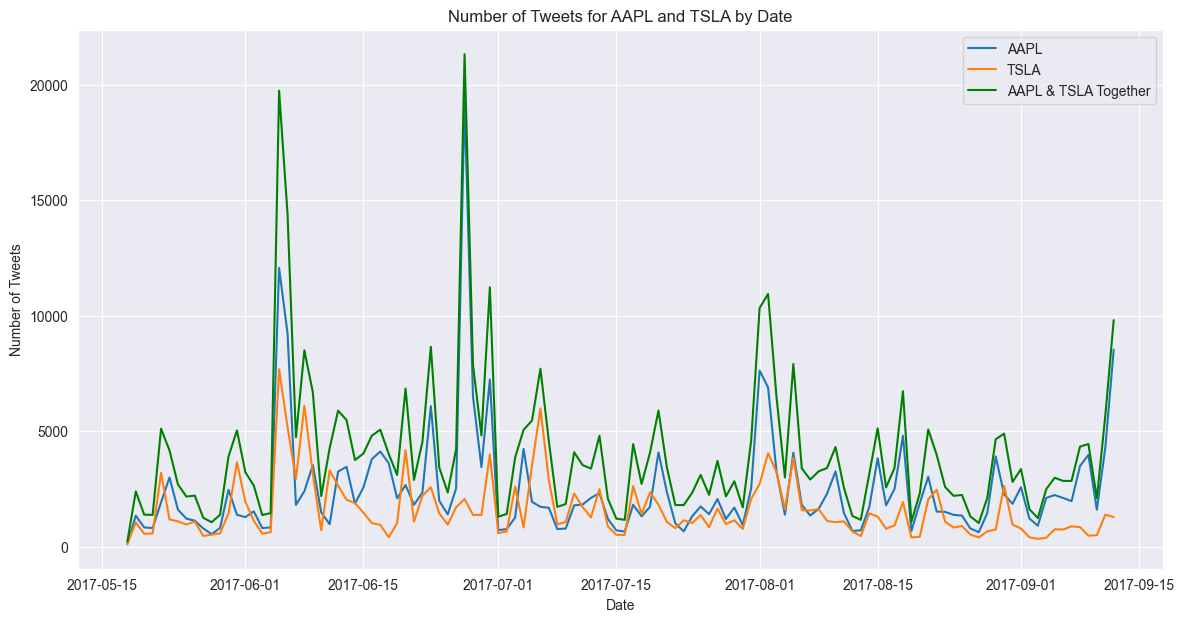

In [34]:
# Plot the daily tweet counts and co-occurrence
plt.figure(figsize=(14, 7))
plt.plot(co_occurrence_daily_tweets['date'], co_occurrence_daily_tweets['AAPL_tweet_count'], label='AAPL')
plt.plot(co_occurrence_daily_tweets['date'], co_occurrence_daily_tweets['TSLA_tweet_count'], label='TSLA')
plt.plot(co_occurrence_daily_tweets['date'], co_occurrence_daily_tweets['AAPL_tweet_count'] + co_occurrence_daily_tweets['TSLA_tweet_count'], 
         label='AAPL & TSLA Together', color='green')
plt.legend()
plt.title('Number of Tweets for AAPL and TSLA by Date')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()